In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [11]:
with open("統計報告.csv") as f:
    df_train=pd.read_csv(f)
df_train.columns= ["Age","Sex","BMI","Children","Smoker","Region","Charge"]
df_train

,Age,Sex,BMI,Children,Smoker,Region,Charge
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
3,33,male,22.71,0,no,northwest,21984.4706
4,32,male,28.88,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


In [53]:
Sex_map = {'female':0,'male':1}
Smoker_map = {'yes':0,'no':1}
Region_map = {'southwest':0,"southeast":1,'northwest':2,"northeast":3}
df_train["isSex"] = df_train["Sex"].map(Sex_map)
df_train["isSmoker"] = df_train["Smoker"].map(Smoker_map)
df_train["isRegion"] = df_train["Region"].map(Region_map)

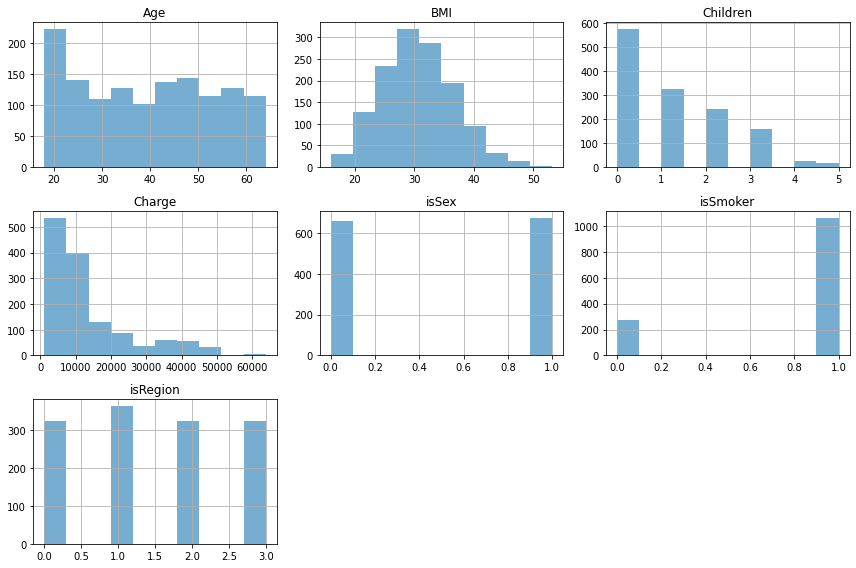

In [74]:
df_train.hist(alpha=0.6, figsize=(12,8))
plt.tight_layout()
plt.show()

In [1]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train,figsize=(15,15),color='b', diagonal='kde')

NameError: name 'df_train' is not defined

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


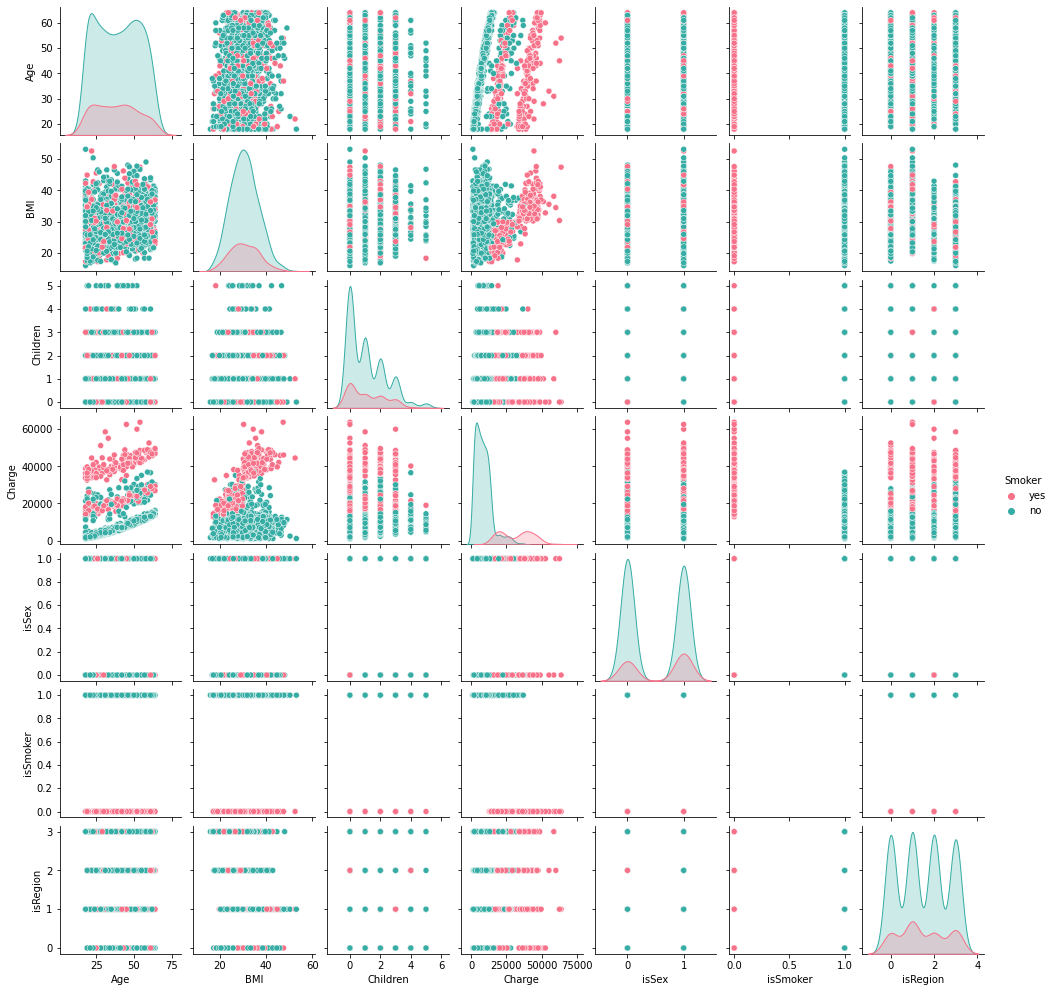

In [56]:
sns.pairplot(df_train, hue="Smoker",size=2, diag_kind="kde",palette="husl")

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


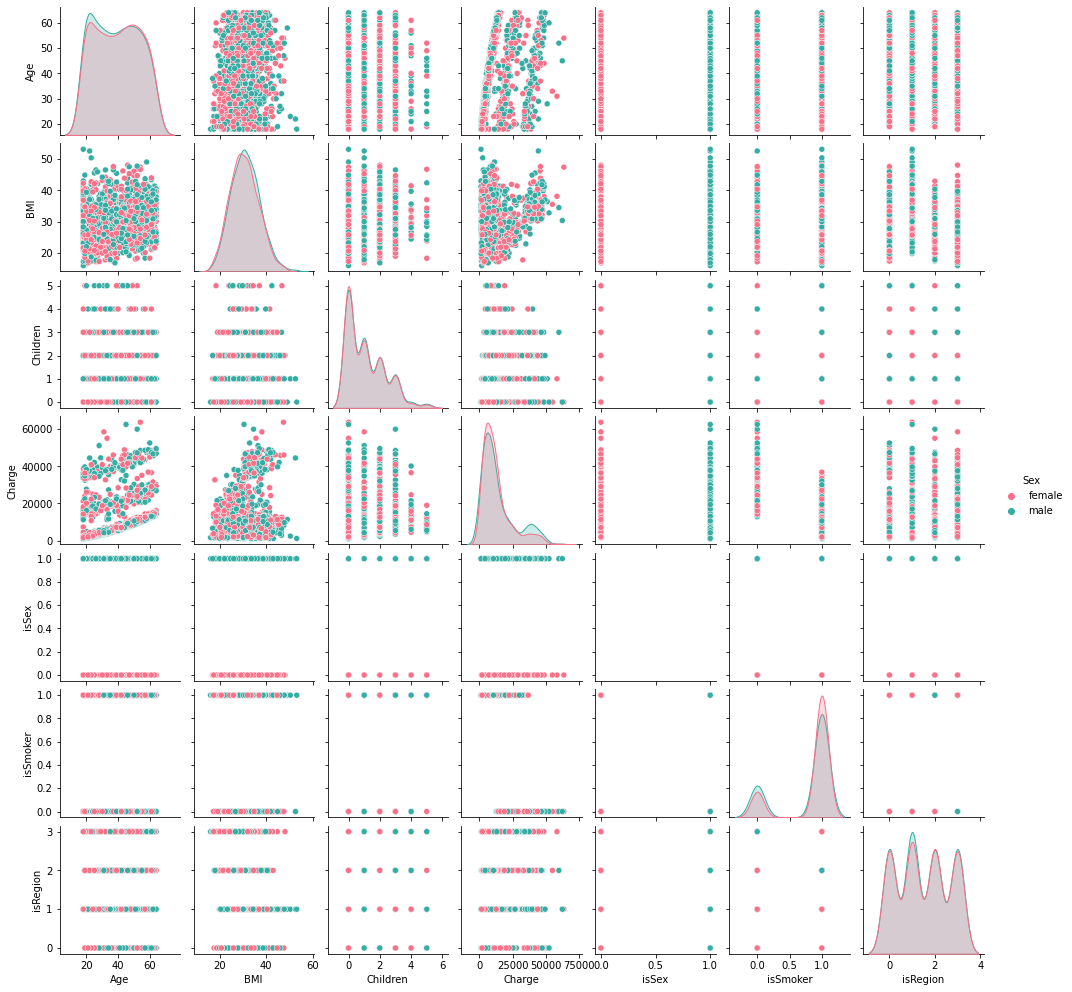

In [57]:
sns.pairplot(df_train, hue="Sex",size=2, diag_kind="kde",palette="husl")

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


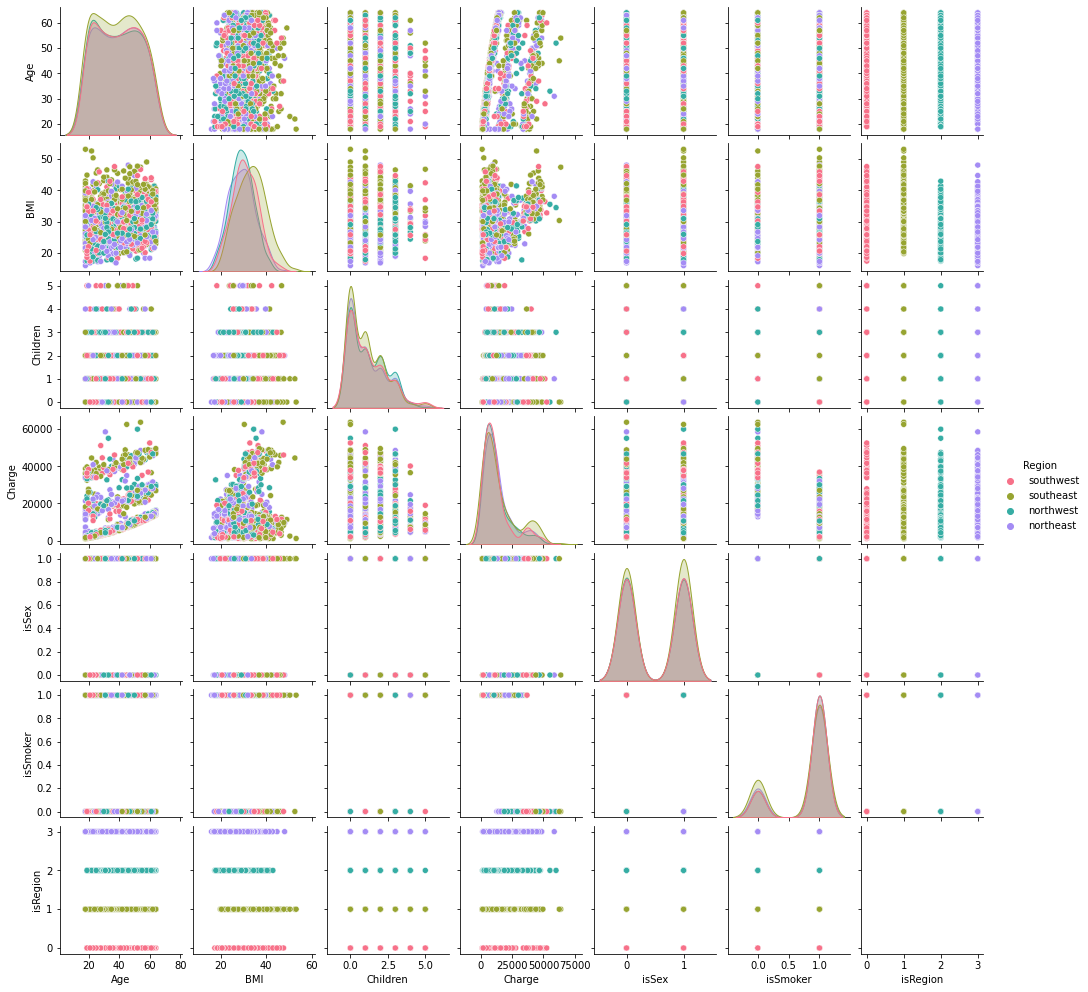

In [58]:
sns.pairplot(df_train, hue="Region",size=2, diag_kind="kde",palette="husl")

<AxesSubplot:>

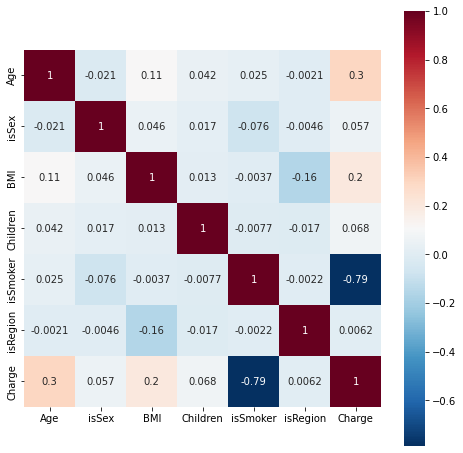

In [59]:
corr = df_train[["Age","isSex","BMI","Children","isSmoker","isRegion","Charge"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


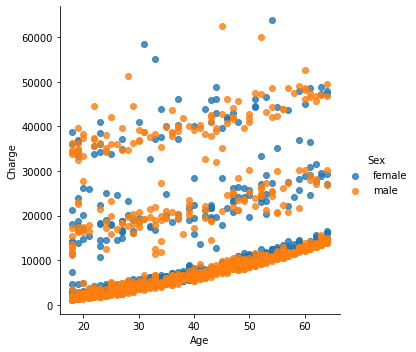

In [60]:
sns.lmplot("Age", "Charge", hue='Sex', data=df_train, fit_reg=False)

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


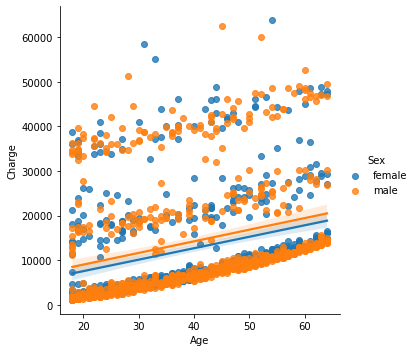

In [81]:
sns.lmplot("Age", "Charge", hue='Sex', data=df_train)

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


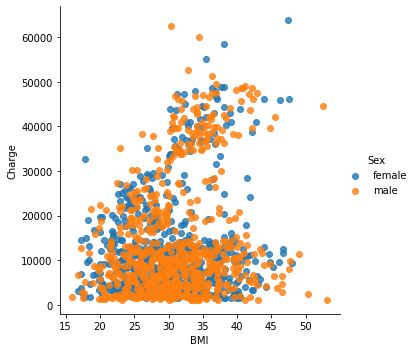

In [61]:
sns.lmplot("BMI", "Charge", hue='Sex', data=df_train, fit_reg=False)

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


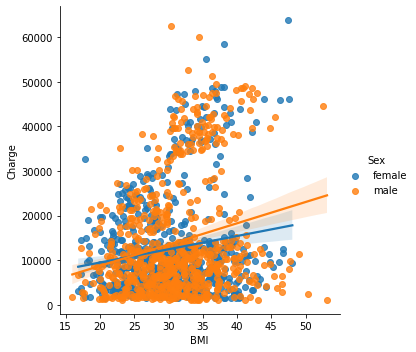

In [82]:
sns.lmplot("BMI", "Charge", hue='Sex', data=df_train)

In [62]:
df_train

,Age,Sex,BMI,Children,Smoker,Region,Charge,isSex,isSmoker,isRegion
0,19,female,27.90,0,yes,southwest,16884.9240,0,0,0
1,18,male,33.77,1,no,southeast,1725.5523,1,1,1
2,28,male,33.00,3,no,southeast,4449.4620,1,1,1
3,33,male,22.71,0,no,northwest,21984.4706,1,1,2
4,32,male,28.88,0,no,northwest,3866.8552,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483,1,1,2
1334,18,female,31.92,0,no,northeast,2205.9808,0,1,3
1335,18,female,36.85,0,no,southeast,1629.8335,0,1,1
1336,21,female,25.80,0,no,southwest,2007.9450,0,1,0


Text(0.5, 1.0, 'Charge')

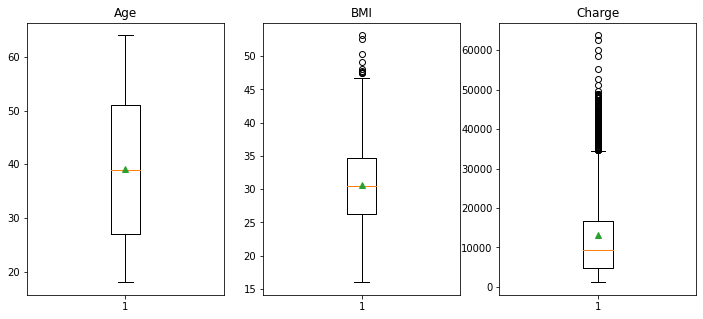

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5), sharey=False)
axes[0].boxplot(df_train['Age'],showmeans=True)
axes[0].set_title('Age')

axes[1].boxplot(df_train['BMI'],showmeans=True)
axes[1].set_title('BMI')

axes[2].boxplot(df_train['Charge'],showmeans=True)
axes[2].set_title('Charge')

Text(0.5, 1.0, 'Region')

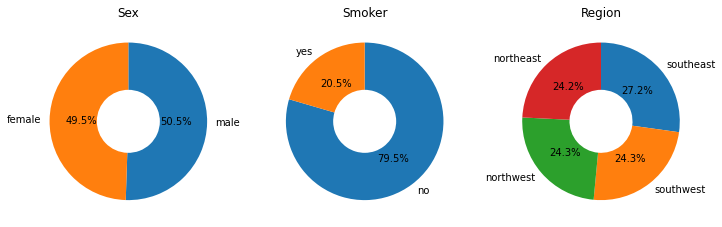

In [64]:
Sex_counts = df_train['Sex'].value_counts()
Smoker_counts = df_train['Smoker'].value_counts()
Region_counts = df_train['Region'].value_counts()

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(12,5), sharey=False)
axis[0].pie(Sex_counts, labels = Sex_counts.index, autopct="%1.1f%%", startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6})
axis[0].set_title("Sex")
axis[1].pie(Smoker_counts, labels = Smoker_counts.index, autopct="%1.1f%%", startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6})
axis[1].set_title("Smoker")
axis[2].pie(Region_counts, labels = Region_counts.index, autopct="%1.1f%%", startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.6})
axis[2].set_title("Region")

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

[Text(0.5, 0, 'Charge'), Text(0.5, 1.0, 'Distribution of Charge')]

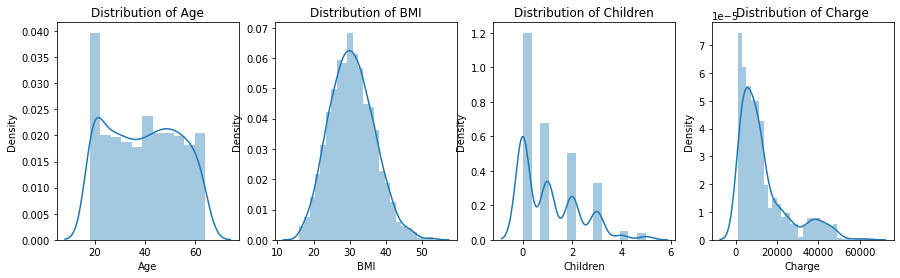

In [68]:
fig, axis = plt.subplots(nrows=1,ncols=4,figsize=(25,5))

fig.set_size_inches(15, 4)
sns.distplot(df_train["Age"][:],ax=axis[0])
sns.distplot(df_train["BMI"][:],ax=axis[1])
sns.distplot(df_train["Children"][:],ax=axis[2])
sns.distplot(df_train["Charge"][:],ax=axis[3])

axis[0].set(xlabel='Age',title="Distribution of Age")
axis[1].set(xlabel='BMI',title="Distribution of BMI")
axis[2].set(xlabel='Children',title="Distribution of Children")
axis[3].set(xlabel='Charge',title="Distribution of Charge")


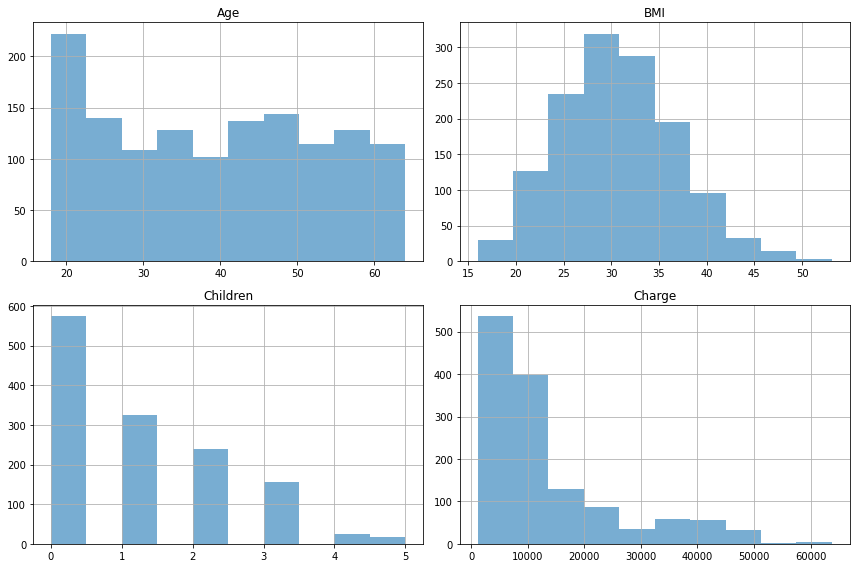

In [80]:
df = df_train.drop(labels=['isSex','isSmoker','isRegion'],axis=1)
df.hist(alpha=0.6, figsize=(12,8))
plt.tight_layout()
plt.show()